In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [54]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

assert X_train.shape[0] == y_train.shape[0], "Shape is not equal"

In [55]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [64]:
for i in range(1, 4):
    tree = DecisionTreeClassifier(min_samples_leaf=i).fit(X_train, y_train)
    pred = tree.predict(X_test)
    print(f"Min samples leaf : {i}")
    print(classification_report(y_test, pred))

Min samples leaf : 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      1.00      1.00       677
           2       1.00      1.00      1.00       666

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Min samples leaf : 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      1.00      1.00       677
           2       1.00      1.00      1.00       666

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Min samples leaf : 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      1.00      1.00       677
           2

In [58]:
pred = tree.predict(X_test)

In [62]:
pca.explained_variance_

array([76.95765454, 37.59698627,  1.10942329])

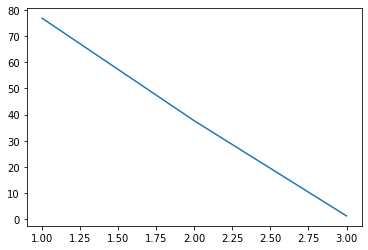

In [60]:
plt.plot(np.arange(1, 4), pca.explained_variance_)

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      1.00      1.00       670
           2       1.00      1.00      1.00       673

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [22]:
y_train == 0

array([False, False, False, ..., False, False, False])

In [23]:
pca_0 = pca[y_train == 0]
pca_1 = pca[y_train==1]
pca_2 = pca[y_train==2]

In [34]:
pca_0

array([[-11.06428674,  -6.28870546],
       [-10.44603   ,  -4.9143335 ],
       [ -8.2706845 ,  -4.78315683],
       ...,
       [ -9.87466787,  -6.31315612],
       [ -8.5883358 ,  -4.82178126],
       [-11.08567085,  -4.37423349]])

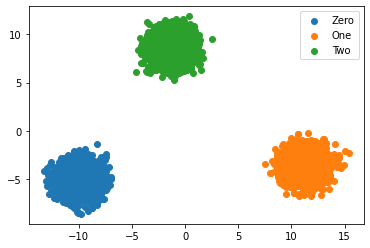

In [24]:
plt.scatter(pca_0[:, 0], pca_0[:, 1], label='Zero')
plt.scatter(pca_1[:, 0], pca_1[:, 1], label='One')
plt.scatter(pca_2[:, 0], pca_2[:, 1], label='Two')
plt.legend(loc='best');

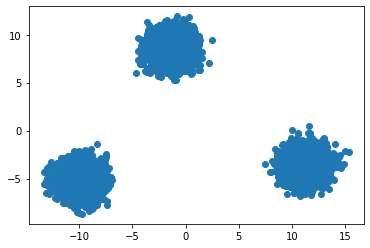

In [29]:
plt.scatter(pca[:, 0], pca[:, 1]);

[Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv)

[Information](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)

In [30]:
columns = ['pregnant_times', 'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 
           'serum_insulin', 'body_mass', 'diabetes_pedigree', 'age', 'diabetes']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, names=columns, header=None)
df

,pregnant_times,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,body_mass,diabetes_pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
pca = PCA(n_components=2).fit_transform(df.iloc[:, :-1])

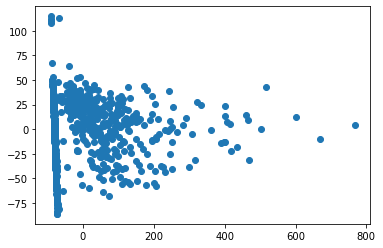

In [33]:
plt.scatter(pca[:, 0], pca[:, 1]);

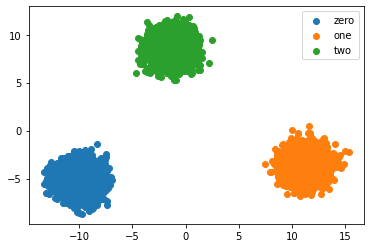

In [27]:
pca_0 = pca[y == 0]
pca_1 = pca[y == 1]
pca_2 = pca[y == 2]


plt.scatter(pca_0[:, 0], pca_0[:, 1], label='zero')
plt.scatter(pca_1[:, 0], pca_1[:, 1], label='one')
plt.scatter(pca_2[:, 0], pca_2[:, 1], label='two')
plt.legend(loc='best');

## [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)

In [51]:
seed = 4

In [52]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=3)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(decision_tree, X, y)
results.mean()

/home/nguyen_truong/anaconda3/envs/nmtruong/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9970000000000001